In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np

/home/warrior/miniconda3/envs/dl/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
PATH = "prediction/tensor_image.pth"

In [4]:
y_tensor = torch.load(PATH, map_location=torch.device('cpu'))
print(y_tensor.shape)

torch.Size([1, 1, 32, 32, 32])


In [5]:
y_image = y_tensor.squeeze()
print(y_image.shape)

torch.Size([32, 32, 32])


In [6]:
y_image = y_image.permute(1, 2, 0)
print(y_image.shape)

torch.Size([32, 32, 32])


In [7]:
img = y_image.cpu().detach().numpy()
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(32, 32, 32)


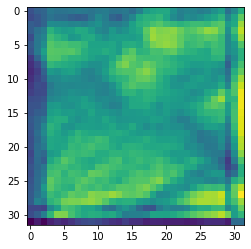

In [8]:
plt.imshow(img[:,:,7])

In [9]:
input_  = nib.load('data/hippo_train.nii.gz')
input_data = input_.get_fdata()
print(type(input_data))
print('Height, Width, N_images, Channels')
print(input_data.shape)

<class 'numpy.ndarray'>
Height, Width, N_images, Channels
(32, 32, 32)


In [10]:
train  = nib.load('data/train/hippocampus_001.nii.gz')
train_data = train.get_fdata()
print(type(train_data))
print('Height, Width, N_images, Channels')
print(train_data.shape)

<class 'numpy.ndarray'>
Height, Width, N_images, Channels
(35, 51, 35)


In [11]:
label  = nib.load('data/label/hippocampus_001.nii.gz')
label_data = label.get_fdata()
print(type(label_data))
print('Height, Width, N_images, Channels')
print(label_data.shape)

<class 'numpy.ndarray'>
Height, Width, N_images, Channels
(35, 51, 35)


In [19]:
index_image = 17

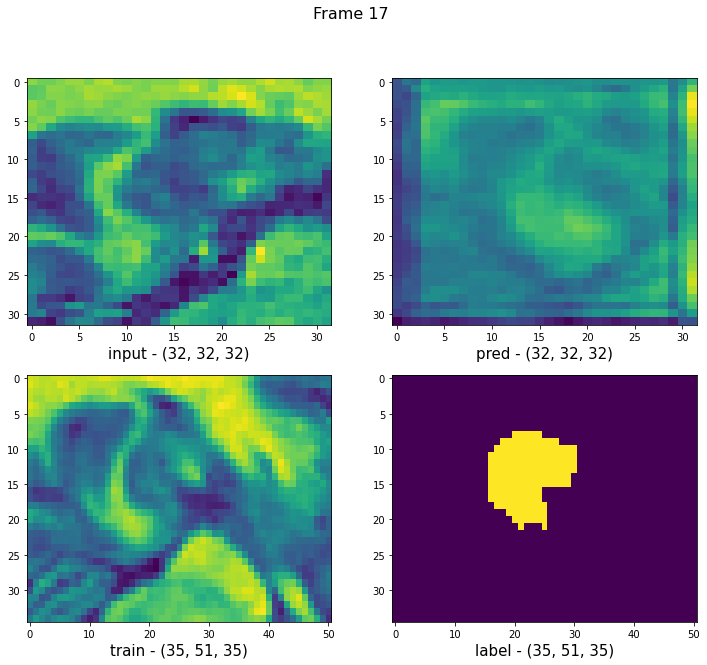

In [20]:
rows, cols = 2, 2
image_set = np.array([[input_data, img], [train_data, label_data]], dtype=object)
image_name = np.array([['input','pred'], ['train', 'label']])
fig, ax = plt.subplots(rows, cols, figsize=(12,10))
fig.suptitle('Frame {}'.format(index_image), fontsize=16)
for row in range(rows):
    for col in range(cols):
        plot_image = image_set[row,col]
        ax[row,col].imshow(plot_image[:,:,index_image], aspect='auto')
        ax[row,col].set_xlabel("{} - {}".format(image_name[row,col],plot_image.shape), fontsize=15)